# Drive for Show, Putt for Dough!

The age old adage, "drive for show, putt for dough" has long been spoken in golf. However, what impact do each of these components have on getting a top finish on the PGA Tour? And most importantly, are good driving and putting statistics strong predictors of success? 

We will be using data from the 2019 PGA Tour season, with the objective of better understanding the relationships of Driving and Putting with success on tour.

### Importing the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pga_df = pd.read_csv('PGA_2019_data.csv')
pga_df.head()

,player_name,date,tournament,statistic,variable,value
0,Hideki Matsuyama,2019-08-25,TOUR Championship,Approaches from 100-125 yards,RANK THIS WEEK,1
1,Webb Simpson,2019-08-25,TOUR Championship,Approaches from 100-125 yards,RANK THIS WEEK,2
2,Brandt Snedeker,2019-08-25,TOUR Championship,Approaches from 100-125 yards,RANK THIS WEEK,3
3,Jon Rahm,2019-08-25,TOUR Championship,Approaches from 100-125 yards,RANK THIS WEEK,4
4,Paul Casey,2019-08-25,TOUR Championship,Approaches from 100-125 yards,RANK THIS WEEK,5


In [4]:
pga_df.shape

(1973034, 6)

In [5]:
pd.set_option('display.max_row', 1000)

### Reshaping the data

Below, we will covert the Dataframe to a wide format, for ease of use.

In [9]:
#Converting DF to wide format
StatVar = pga_df['statistic'] + ' - (' + pga_df['variable'] + ')'
del pga_df['variable']
pga_df['variable'] = StatVar

df = pga_df.set_index(['player_name', 'variable', 'date', 'tournament'])['value'].unstack('variable').reset_index()

Below we will choose some columns to take a closer look at:

In [10]:
f1 = 'player_name'
f2 = 'tournament'
f3 = 'Putts Per Round - (Putts Per Round - (AVG))'
f4 = '3-Putt Avoidance - (3-Putt Avoidance - (%))'
f5 = 'Total Putting - (Total Putting - (TOTAL))'
f6 = 'Driving Distance - (Driving Distance - (AVG.))'
f7 = 'Driving Accuracy Percentage - (Driving Accuracy Percentage - (%))'
f8 = 'Total Driving - (Total Driving - (TOTAL))'
f9 = 'Scoring Average - (Scoring Average - (AVG))'
f10 = 'FedexCup Regular Season Points - (FedexCup Regular Season Points - (RANK THIS WEEK))'
f11 = 'Official Money - (Official Money - (MONEY))'


features = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]

Most of these metrics are self explanatory, however I would like to clarify Total Putting and Total Driving.

As per PGA.com, Total Putting as defined as:

"Total Putting is computed using 6 putting stats Putting from 3-5', 
Putting from 5-10', Putting from 10-15', Putting from 15-20', Putting from 20-25' and Three Putt Avoidance from > 25'. Each statistic is given a numerical weighting based on the frequency of putts attempted from each distance. The players rank in each of the statistics used is multiplied by the corresponding weigh factor, totalled, and divided by the number of statistics used to produce the Total Putting Value."

In addition, PGA.com calculates Total Driving as "Total Driving = Players Distance Ranking + Accuracy Ranking."

Both of these metrics appear to be solid all encompasing indications of a players overall putting and driving attributes for any given event.

**Also important to note: for both Total Putting and Total Driving, lower values = better results**




In [11]:
df1 = df[features].copy()
df1.head()

variable,player_name,tournament,Putts Per Round - (Putts Per Round - (AVG)),3-Putt Avoidance - (3-Putt Avoidance - (%)),Total Putting - (Total Putting - (TOTAL)),Driving Distance - (Driving Distance - (AVG.)),Driving Accuracy Percentage - (Driving Accuracy Percentage - (%)),Total Driving - (Total Driving - (TOTAL)),Scoring Average - (Scoring Average - (AVG)),FedexCup Regular Season Points - (FedexCup Regular Season Points - (RANK THIS WEEK)),Official Money - (Official Money - (MONEY))
0,Aaron Baddeley,Safeway Open,29.75,1.39,63.8,295.0,50.00,113,69.393,4,"$241,280"
1,Aaron Baddeley,The RSM Classic,29.75,2.78,116.2,278.5,73.21,97,70.429,56,"$13,888"
2,Aaron Baddeley,Desert Classic,26.75,.00,15.2,287.6,71.43,53,70.460,18,"$64,723"
3,Aaron Baddeley,Genesis Open,28.00,2.78,72.8,289.0,57.14,53,70.723,49,"$18,944"
4,Aaron Baddeley,Puerto Rico Open,28.00,2.78,72.8,289.0,57.14,53,70.723,49,"$18,944"


### Cleaning the data

Below I have shortened the name of each column for ease of use, as well as transformed the data for use in our statistical models later on.

In [12]:
df1.rename(columns = {'Putts Per Round - (Putts Per Round - (AVG))' : 'Putts Per Round'},inplace = True)
df1.rename(columns = {'Total Putting - (Total Putting - (TOTAL))' : 'Total Putting'}, inplace = True)
df1.rename(columns = {'3-Putt Avoidance - (3-Putt Avoidance - (%))' : '3 Putt Avoidance'}, inplace = True)
df1.rename(columns = {'Driving Distance - (Driving Distance - (AVG.))' : 'Average Driving Distance'}, inplace = True)
df1.rename(columns = {'Driving Accuracy Percentage - (Driving Accuracy Percentage - (%))' : 'Driving Accuracy Percentage'} , inplace = True)
df1.rename(columns = {'Total Driving - (Total Driving - (TOTAL))' : 'Total Driving'}, inplace = True)
df1.rename(columns = {'Scoring Average - (Scoring Average - (AVG))' : 'Scoring Average'}, inplace = True)
df1.rename(columns = {'FedexCup Regular Season Points - (FedexCup Regular Season Points - (RANK THIS WEEK))' : 'Tournament Rank'}, inplace = True)
df1.rename(columns = {'Official Money - (Official Money - (MONEY))' : 'Tournament Earnings'}, inplace = True)



df1.head()

variable,player_name,tournament,Putts Per Round,3 Putt Avoidance,Total Putting,Average Driving Distance,Driving Accuracy Percentage,Total Driving,Scoring Average,Tournament Rank,Tournament Earnings
0,Aaron Baddeley,Safeway Open,29.75,1.39,63.8,295.0,50.00,113,69.393,4,"$241,280"
1,Aaron Baddeley,The RSM Classic,29.75,2.78,116.2,278.5,73.21,97,70.429,56,"$13,888"
2,Aaron Baddeley,Desert Classic,26.75,.00,15.2,287.6,71.43,53,70.460,18,"$64,723"
3,Aaron Baddeley,Genesis Open,28.00,2.78,72.8,289.0,57.14,53,70.723,49,"$18,944"
4,Aaron Baddeley,Puerto Rico Open,28.00,2.78,72.8,289.0,57.14,53,70.723,49,"$18,944"


In [13]:
#Removing the '$' and ,',' from Tournament earnings

df1 = df1.replace({'\$':'', ',':''}, regex = True)
df1.head()


variable,player_name,tournament,Putts Per Round,3 Putt Avoidance,Total Putting,Average Driving Distance,Driving Accuracy Percentage,Total Driving,Scoring Average,Tournament Rank,Tournament Earnings
0,Aaron Baddeley,Safeway Open,29.75,1.39,63.8,295.0,50.00,113,69.393,4,241280
1,Aaron Baddeley,The RSM Classic,29.75,2.78,116.2,278.5,73.21,97,70.429,56,13888
2,Aaron Baddeley,Desert Classic,26.75,.00,15.2,287.6,71.43,53,70.460,18,64723
3,Aaron Baddeley,Genesis Open,28.00,2.78,72.8,289.0,57.14,53,70.723,49,18944
4,Aaron Baddeley,Puerto Rico Open,28.00,2.78,72.8,289.0,57.14,53,70.723,49,18944


In [14]:
#Changing all columns to floats

for x in df1.iloc[:, 2:]:
    df1[x] = df1[x].astype(float)

3 Putt Avoidance is easier interpreted when using made % as a basis, therefore I have modified it from its prior missed % format to show how often they escaped without a 3 putt.

In [15]:
df1['3 Putt Avoidance'] = df1['3 Putt Avoidance'].apply(lambda x: 100 - x)
df1.head()

variable,player_name,tournament,Putts Per Round,3 Putt Avoidance,Total Putting,Average Driving Distance,Driving Accuracy Percentage,Total Driving,Scoring Average,Tournament Rank,Tournament Earnings
0,Aaron Baddeley,Safeway Open,29.75,98.61,63.8,295.0,50.00,113.0,69.393,4.0,241280.0
1,Aaron Baddeley,The RSM Classic,29.75,97.22,116.2,278.5,73.21,97.0,70.429,56.0,13888.0
2,Aaron Baddeley,Desert Classic,26.75,100.00,15.2,287.6,71.43,53.0,70.460,18.0,64723.0
3,Aaron Baddeley,Genesis Open,28.00,97.22,72.8,289.0,57.14,53.0,70.723,49.0,18944.0
4,Aaron Baddeley,Puerto Rico Open,28.00,97.22,72.8,289.0,57.14,53.0,70.723,49.0,18944.0


Adding one more column to indicate whether or not a golfer had a Top 10 finish (Yes/No) in any given event. This will be used for binary classification in a further part of this analysis.

In [16]:
df1['Top 10 Finish'] = df1['Tournament Rank'].apply(lambda x: 'Yes' if x <= 10 else 'No')
df1.head()

variable,player_name,tournament,Putts Per Round,3 Putt Avoidance,Total Putting,Average Driving Distance,Driving Accuracy Percentage,Total Driving,Scoring Average,Tournament Rank,Tournament Earnings,Top 10 Finish
0,Aaron Baddeley,Safeway Open,29.75,98.61,63.8,295.0,50.00,113.0,69.393,4.0,241280.0,Yes
1,Aaron Baddeley,The RSM Classic,29.75,97.22,116.2,278.5,73.21,97.0,70.429,56.0,13888.0,No
2,Aaron Baddeley,Desert Classic,26.75,100.00,15.2,287.6,71.43,53.0,70.460,18.0,64723.0,No
3,Aaron Baddeley,Genesis Open,28.00,97.22,72.8,289.0,57.14,53.0,70.723,49.0,18944.0,No
4,Aaron Baddeley,Puerto Rico Open,28.00,97.22,72.8,289.0,57.14,53.0,70.723,49.0,18944.0,No


### Checking the data for Null values

Below is a visualization of missing values in each column; yellow indicates missing, while purple indicates filled.

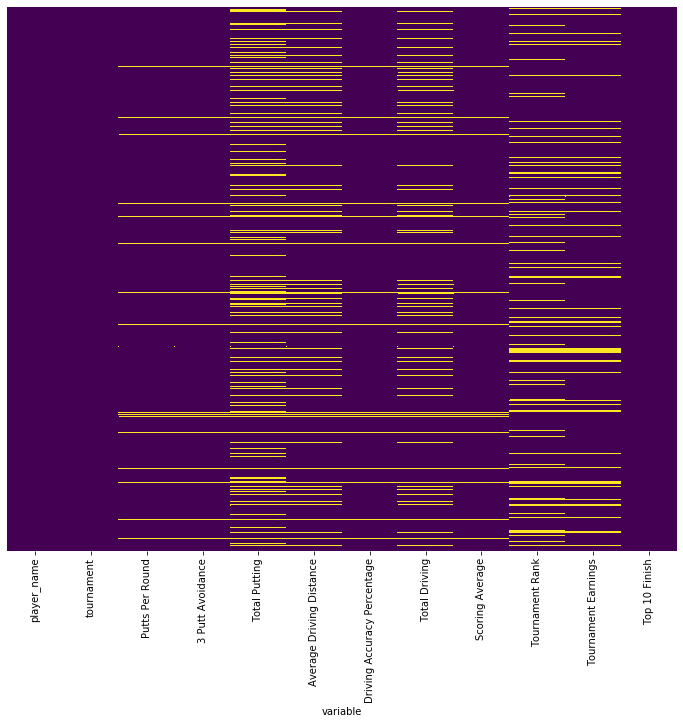

In [17]:
plt.figure(figsize=(12,10))
df1.isnull() #checking for null data - if null, will show as True
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [18]:
df1.shape

(3200, 12)

Checking the quantities of missing values by column.

In [19]:
df1.isnull().sum()

variable
player_name                      0
tournament                       0
Putts Per Round                 82
3 Putt Avoidance                82
Total Putting                  613
Average Driving Distance       393
Driving Accuracy Percentage     82
Total Driving                  393
Scoring Average                 82
Tournament Rank                457
Tournament Earnings            305
Top 10 Finish                    0
dtype: int64

Based on the quantities above, I have elected to drop all rows with missing values to keep the data balanced.

In [20]:
df1.dropna(axis = 0, inplace = True)
df1.shape

(2243, 12)

### Correlation & Data Visualizations

Below, we will explore the correlations between our continuous variables, through the use of a Heatmap.

This should provide some early indications of relationships between variables, and allow us to begin to form a deeper understanding of the dataset.

We will then further examine the relationships between select variables, through various data visualizations. 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
corr = df1.corr()

feature_cols = ['Putts Per Round', '3 Putt Avoidance', 'Total Putting', 'Average Driving Distance',
               'Driving Accuracy Percentage', 'Total Driving', 'Scoring Average', 'Tournament Rank', 'Tournament Earnings']

In [24]:
corr[feature_cols] = scaler.fit_transform(corr[feature_cols])

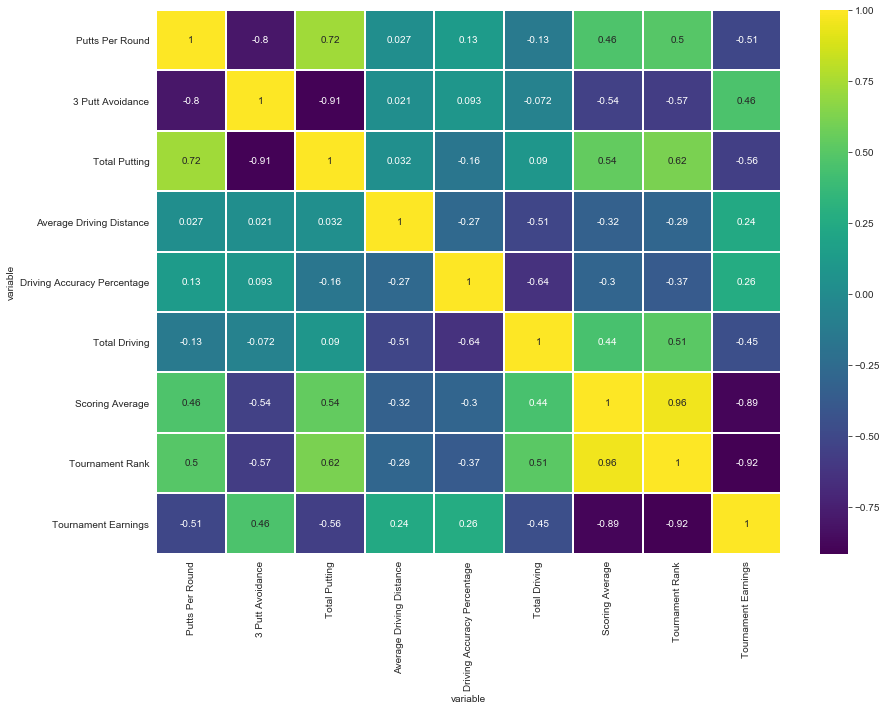

In [88]:
corr 

plt.figure(figsize=(14,10))
sns.heatmap(corr.corr(), annot = True, cmap = 'viridis', linecolor = 'white', linewidth = 1)

Observations from above:
- There are strong negative linear relationships between Scoring Average and Tournament Earnings (-0.89) as well as Tournament Rank and Tournament Earnings (-0.92). This is to be expected, as the lower the score a golfer shoots, the their better rank is, ultimately resulting in higher earnings.


- There is also a moderate negative linear relationship between 3 Putt Avoidance and Scoring Average (-0.54) and 3 Putt Avoidance and Tournament Rank (-0.57). This makes sense, as lowering the amount of 3 putts made in a round will reduce total strokes, and thus result in better scores.


- There is a negative linear relationship between Driving Accuracy Percentage and Average Driving Distance (-0.27). This is interesting, as it may indicate that there is a trade off between driving the ball far and driving it accurately.


- When comparing Total Putting to Total Driving, Total putting seems to have an edge when paired with both Scoring Average and Tournament Rank. 
    - To build on this point, Total Putting and Scoring Average share a positive correlation at 0.54, whereas Total Driving and Scoring Average come in at 0.44.
    - In addition, it is a similar story when looking at Tournament Rank, as Total Putting correlates with this variable at 0.62, whereas Total Driving correlates at 0.51.
    - This is significant as it can mean that a poor putting performance can be more detrimental to ones score than a poor driving performance.

#### Plotting  Total Putting Rank & Tournament Rank

As touched on above, it appears that as a golfers Total Putting score declines (remember, lower = better), their tournament rank shifts towards the top positions (ie 1st place, 2nd place etc). Conversely, as Tournament Rank goes up, so does Total Putting score.

Based on the density below, most golfers will typcially be within a Total Putting score of 50-100, however golfers towards the top of the leaderboards can reach scores as low as 25.

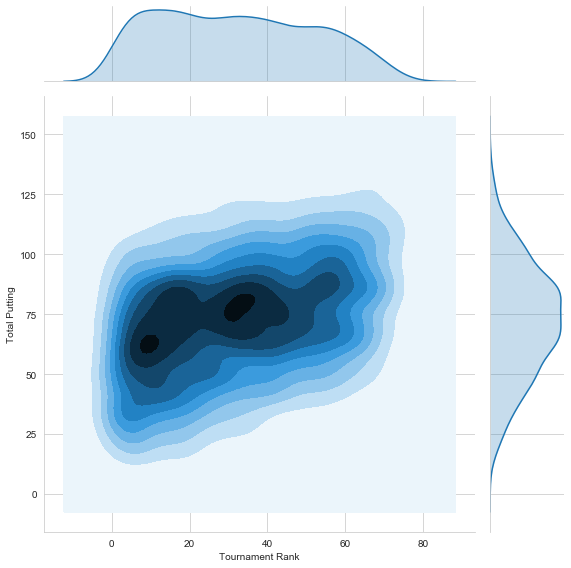

In [30]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Tournament Rank', y = 'Total Putting', data = df1, kind = 'kde', height = 8)

#### Plotting Average Driving Distance vs Driving Accuracy Percentage

This plot illustrates the trade off between Distance and Accuracy from the tee box.
The data appears to be inversely correlated (-0.27), and it is visually apparent that as distance increases, accuracy declines (with some outliers).

It also highlights that there are a significant number of players that sit within the 280-300 yard range with approximately 50-65% driving accuracy.

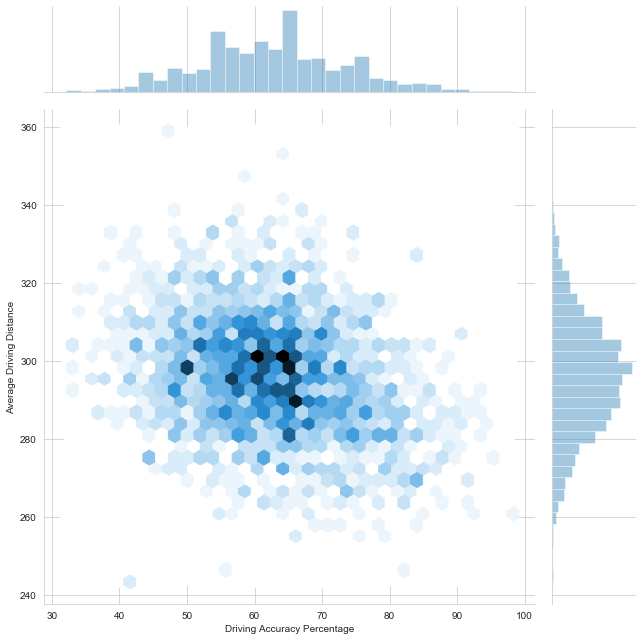

In [31]:
sns.jointplot(x = 'Driving Accuracy Percentage', y = 'Average Driving Distance', data = df1, kind = 'hex', height = 9)

#maybe use plotly here?

#### Plotting Scoring Average and Average Driving Distance

This plot highlights the relationship between Scoring Average and Average Driving Distance.
Similar to the plots above, and as noted in the heatmap, these two variables share a negative linear relationship (-0.32).

It is also visually evident that there are a significant amount of outliers scattered around this plot. For example, there is a player with an Average Score of 76 that drove the ball approximately 250 yards, as well as some who shot sub 66 scores with average drives over 320 yards. This again speaks to the inverse relationship between the two variables, as it indicates that further drives can equal lower scores, and vice versa.



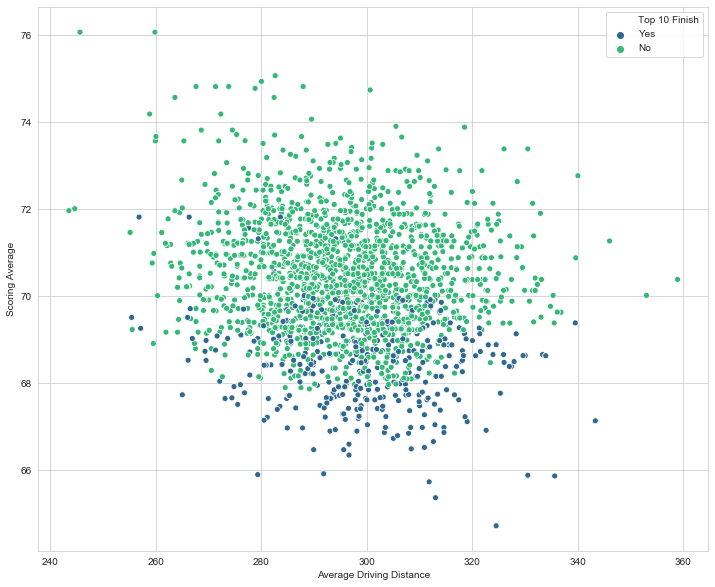

In [32]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = 'Average Driving Distance', y = 'Scoring Average', data = df1, hue = 'Top 10 Finish', palette = 'viridis')

Out of curiosity, what are the average driving distances and scoring averages on tour?

In [36]:
avg_driving_dist = round(df1['Average Driving Distance'].mean(),1)
scoring_avg = round(df1['Scoring Average'].mean(),1)

print('The average driving distance on tour is',avg_driving_dist)
print('The scoring average on tour is', scoring_avg)

The average driving distance on tour is 296.0
The scoring average on tour is 70.1


We know that professional golfers are at the pinacle of the sport, so a scoring average of 70 (-2 on most courses) does not seem too surprising. In fact, scoring averages have remained largely the same over the course of the past 20 years.

However, driving distance is an area that has undergone a vast improvement. For example, in the year 2000, the average driving distance on tour was 273 yards, and in 2010 was 287 yards.

There are likely many contributing factors in play when it comes to the increase in driving distance over the years, however two that come to mind are 1) Consistent innovation in equipment 2) Improved physical coniditioning of golfers.

It will be interesting to see what this figure looks like in the year 2030!

https://www.pga.com/archive/how-driving-distance-has-changed-over-past-40-years-pga-tour



#### Plotting the distribution of Average Driving Distance on tour.

As we can see below, driving distances on tour are highly dispersed.

On average in 2019, PGA Tour golfers drove the ball 296.0 yards. However, the longest distance hit was 358.9 yards, while the lowest was 244.5, highlighting the dispersion among driving distances.

In [37]:
print('Average PGA Tour Driving Distance: ', round(df1['Average Driving Distance'].mean(),1))
print('Maxiumum PGA Tour Driving Distance: ', round(df1['Average Driving Distance'].max(), 1))
print('Minimum PGA Tour Driving Distance: ', round(df1['Average Driving Distance'].min(),1))
      

Average PGA Tour Driving Distance:  296.0
Maxiumum PGA Tour Driving Distance:  358.9
Minimum PGA Tour Driving Distance:  243.5


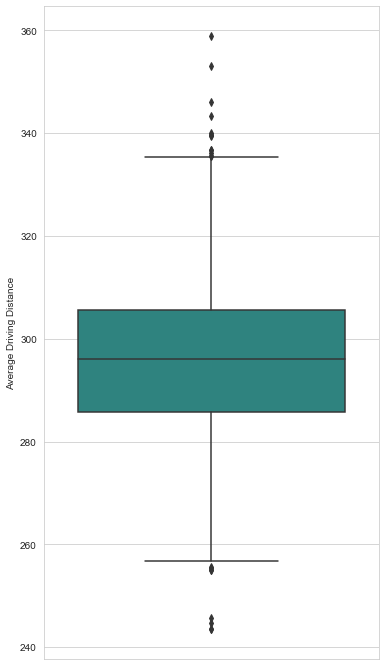

In [42]:
plt.figure(figsize = (6,12))
sns.boxplot(x = 'Average Driving Distance', data = df1, orient = 'v', palette = 'viridis')

### Multiple Linear Regression -  Can we predict Tournament Position?



The goal of the next portion of this analysis is to build a model that can predict the position that a golfer will finish in, based on their Putting and Driving statistics, along with their Scoring Average.

#### Defining Features & Fitting the Model

In [25]:
features = df1[['Putts Per Round', 'Total Putting', '3 Putt Avoidance', 'Average Driving Distance',
               'Driving Accuracy Percentage', 'Total Driving', 'Scoring Average', 'Tournament Rank']]

In [26]:
scaler = StandardScaler()

scaler.fit(features.drop('Tournament Rank', axis = 1))
scaled_features = scaler.transform(features.drop('Tournament Rank', axis = 1))

In [27]:
df_feat = pd.DataFrame(scaled_features, columns = features.columns[:-1])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Splitting data into training and test data, and fitting the model - we will allocate 70% to training and save 30% for testing.

In [47]:
X = df_feat
y = df1['Tournament Rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The coefficients below indicate some intriguing relationships.

For example, a 1 position increase in Tournament rank is associated with a 5.3 unit increase in Total Putting, once again highlighting the significance of putting performance to success on tour.

We also see how an increase in tournament ranking can mean the difference of 12.9 total strokes throughout the course of a tournament. This may indicate that there were several tournaments in 2019 where the leaders significantly distanced themselves from the rest of the pack.

Finally, Total Driving has a coefficient of 3.97; while not quite as significant as Total Putting, this is still a relationship worth keeping an eye on.

In [49]:
coef = round(pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coefficients']),2)
coef

,Coefficients
variable,
Putts Per Round,2.46
Total Putting,5.30
3 Putt Avoidance,2.94
Average Driving Distance,0.51
Driving Accuracy Percentage,-0.02
Total Driving,3.97
Scoring Average,12.94


### Predictions

Below we will execute the model on our test data, and plot out the results.

In [50]:
predictions = lm.predict(X_test)

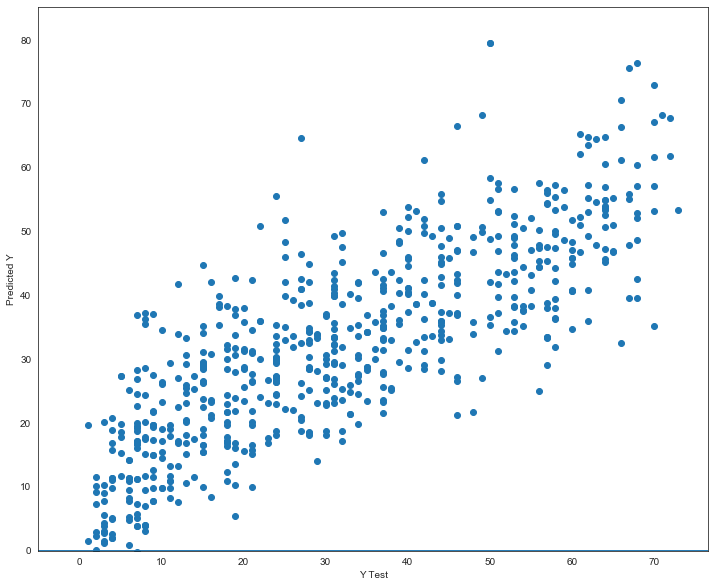

In [51]:
sns.set_style('white')
plt.figure(figsize=(12,10))
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.xlim(-5)
plt.ylabel('Predicted Y')
sns.distplot((y_test, predictions))

In [52]:
from sklearn import metrics

Based on our knowledge of the dispersion within dataset, the results from the linear regression are acceptable.

I opted to look at Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) as loss functions and leave out Mean Squared Error (MSE), as I felt that MSE would be too harsh on outliers. 

With an R2 at 0.65, I believe the model did a decent job at fitting the data. Golf is certainly a challenging sport to predict, and as the data indicates has many outliers. With that being said, this model provides an acceptable basis for prediction.

In [53]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE:  9.02116609071705
RMSE:  11.46617328248445
R2:  0.6522719176583325


Let's see how accurate of a model we can build, this time adding in Tournament Earnings as a feature. 
We noted above the strong correlation between Tournament Earnings and Tournament Rank (-0.92), so this should help in returning more accurate results.

In [54]:
features = df1[['Putts Per Round', 'Total Putting', '3 Putt Avoidance', 'Average Driving Distance',
               'Driving Accuracy Percentage', 'Total Driving', 'Scoring Average', 'Tournament Earnings', 'Tournament Rank']]

In [55]:
scaler = StandardScaler()

scaler.fit(features.drop('Tournament Rank', axis = 1))
scaled_features = scaler.transform(features.drop('Tournament Rank', axis = 1))

In [56]:
df_feat = pd.DataFrame(scaled_features, columns = features.columns[:-1])
df_feat.head()

variable,Putts Per Round,Total Putting,3 Putt Avoidance,Average Driving Distance,Driving Accuracy Percentage,Total Driving,Scoring Average,Tournament Earnings
0,0.850694,-0.355576,0.586733,-0.067799,-1.179280,1.636103,-0.525078,0.622845
1,0.850694,1.860214,-0.122220,-1.173175,0.970972,1.025269,0.198715,-0.463843
2,-1.420410,-2.410680,1.295686,-0.563543,0.806067,-0.654526,0.220373,-0.220907
3,-0.474117,0.024998,-0.122220,-0.469754,-0.517807,-0.654526,0.404115,-0.439681
4,-0.474117,0.024998,-0.122220,-0.469754,-0.517807,-0.654526,0.404115,-0.439681


In [57]:
X = df_feat
y = df1['Tournament Rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
predictions = lm.predict(X_test)

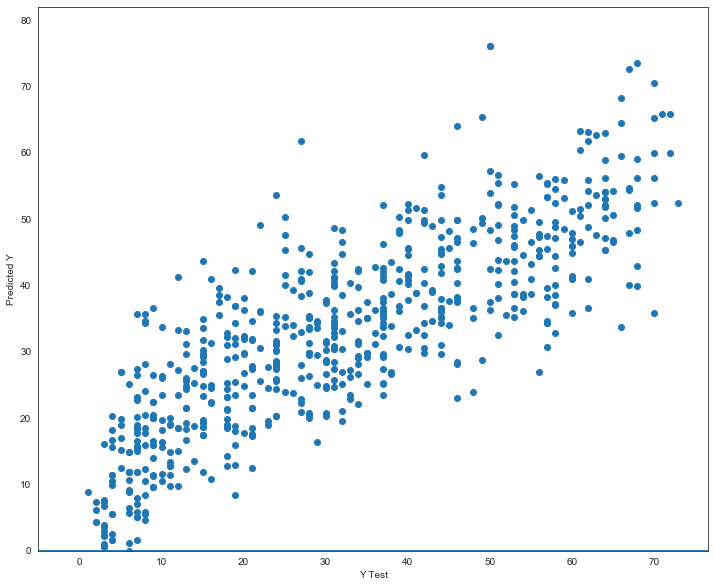

In [60]:
sns.set_style('white')
plt.figure(figsize=(12,10))
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.xlim(-5)
plt.ylabel('Predicted Y')
sns.distplot((y_test, predictions))

Slightly better results across all metrics with Tournament Earnings added in as a feature.

In [61]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2: ', metrics.r2_score(y_test, predictions))

MAE:  8.879875109189374
RMSE:  11.25645118998396
R2:  0.6648758318364208


### Classification - Can we predict a Top 10 finish?

We now turn to the final component of this analysis; How accurately can we predict a Top 10 finish at any given PGA Tour event, using binary classification?

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In defining the features for our prediction, we will leave out both Tournament Rank and Tournament Earnings, as I feel this would not challenge the algorithms enough.

The goal is to place emphasis on Putting and Driving statistics, along with Scoring Average, to truly see how much of an impact they have on making a Top 10 finish. 

In [63]:
features_2 = df1[['Putts Per Round', 'Total Putting', '3 Putt Avoidance', 'Average Driving Distance',
               'Driving Accuracy Percentage', 'Total Driving', 'Scoring Average', 'Top 10 Finish']]

In [64]:
X = features_2.drop('Top 10 Finish', axis = 1)
y = features_2['Top 10 Finish']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Logistic Regression

As discovered previously, our data shares linear relationships. With that in mind, and coupled with the fact that we are working with mutliple continuous variables, we will start by using Logistic Regression.

In [113]:
from sklearn.linear_model import LogisticRegression

In [116]:
logmodel = LogisticRegression(max_iter = 1000)

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
log_pred = logmodel.predict(X_test)

In [85]:
print(confusion_matrix(y_test, log_pred))
print('\n')
print(classification_report(y_test, log_pred))

[[521  23]
 [ 56  73]]


              precision    recall  f1-score   support

          No       0.90      0.96      0.93       544
         Yes       0.76      0.57      0.65       129

    accuracy                           0.88       673
   macro avg       0.83      0.76      0.79       673
weighted avg       0.88      0.88      0.88       673



This model performed well, resulting in 88% accuracy.

It also apparent that it did a better job in predicting non Top 10 finishes (F1-score of 0.93), than it did Top 10 finishes (F1-score of 0.65).

#### Decision Tree

Below, we will use a Decision Tree to see if we can better the results from our previous Logistic Regression model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
predictions = dtree.predict(X_test)

In [71]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[505  39]
 [ 39  90]]


              precision    recall  f1-score   support

          No       0.93      0.93      0.93       544
         Yes       0.70      0.70      0.70       129

    accuracy                           0.88       673
   macro avg       0.81      0.81      0.81       673
weighted avg       0.88      0.88      0.88       673



This model had similar accuracy results when compared with our previous model, at 88%.

It also had the same F1 score as the Logistic Regression model for predicting Non Top 10 finishes, at 0.93.

However, the Decision Tree had stronger results in predicting Top 10 finishes than the Logistic Regression model. This is evidenced in its F1-score of 0.70.

In addition, it had a slightly better misclassification rate at (11.5%) than the Logistic Regression model (11.7%).

#### Random Forest

The final model we will use below is a Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rfc_pred = rfc.predict(X_test)

In [74]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[535   9]
 [ 54  75]]


              precision    recall  f1-score   support

          No       0.91      0.98      0.94       544
         Yes       0.89      0.58      0.70       129

    accuracy                           0.91       673
   macro avg       0.90      0.78      0.82       673
weighted avg       0.91      0.91      0.90       673



The Random Forest performed better than the two previous models in terms of accuracy, at 91%.

It also had better results in predicting Non Top 10 finishes than the previous two models, with a 0.94 F1 score.

When compared to the Decision Tree, the Random Forest performed much better in terms of Precision for correctly predicting finishes inside the Top 10 (0.89 vs 0.70). There was also a significant reduction in Type 1 Errors (False Positives) with 9 vs 39 in the Decision Tree.
However, it is important to note that this model did not perform as well as the Decision Tree in terms of Recall for Predicting finishes inside the Top 10, with 0.58 vs 0.70. 

It also had a significantly lower misclassification rate than the Decision Tree, at 9.3%.

Overall, the Random Forest and Decision Tree both ended up with 0.70 F1-scores in terms of correctly predicting finishes inside the Top 10. However, with a higher overall accuracy, lower misclassification rate, and stronger F1 score in predicting Non Top 10 finishes, the Random Forest was the more effective model for making correct predictions.


### Conclusion & Summary of Findings

Thank you for taking taking the time to read through this analysis! 

This was an exciting project to work though, as I am personally a big fan of golf, both playing and watching it on TV.

Throughout the course of this analysis, we used data from the 2019 PGA Tour season, and specifically drilled down into putting and driving metrics to understand their relationship with success on tour. 

We noted that in general, there were stronger correlations between putting metrics and scoring averages, than driving metrics and scoring averages. This signified the possibility of a poor putting performance being more detrimental to ones round than a poor driving performance, and vice versa. 

We also observed a negative linear relationship between Driving Distance and Driving Accuracy, meaning that there may be a trade off between the two, and that it is typcially challenging for a pro golfer to have the best of both worlds. This was also visually apparent via the hex bin scatterplot in the data visualization portion of the analysis.

Further to the topic of driving, we also saw a visualization between Average Driving Distance and Scoring Average. Two key points were visually perceptable - 1) When Scoring Average went down, Average Driving Distance went up (inverse relationship), and 2) There were a vast number of outliers in the data, ranging from some golfers driving the ball 240 yards and shooting 75+, to some shooting 66 and under with 320+ yard drives.

We were then able to build a Multiple Linear Regression model, with the aim of predicting a golfers tournament ranking. After some tweaking, the model showed positive results with an RMSE of 11.5 and R2 0.65. With the amount of variation we noticed in the data, overall these results were acceptable.

Finally, the aim of the last part of this analysis was to build a binary classification model to predict whether or not a golfer finished within the Top 10 rankings of any given event. After using 3 different methods, Random Forest came out the winner. This was because it predicted accurately 91% of the time, had the lowest misclassification rate at 9.3%, strongest F1 score in predicting Non Top 10 finishes at 0.94, and also had the joint highest F1 score at 0.70 for correctly predicting when a golfer finished within the Top 10 rankings.

Overall, this project was a pleasure to work on, and hope it provided some valuable insight into how putting and driving statistics can impact success on the PGA Tour!